In [158]:
import torch
import rHN
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [159]:
images = list(torchvision.datasets.MNIST(''))


In [160]:
data = torch.zeros((len(images), 784 + 10))

class_indexes = {}

for i in range(len(images)):

    im = torch.from_numpy(np.array(images[i][0]).flatten())

    im = 2 * (im / 255) - 1

    target = torch.zeros((10,1))

    target[int(images[i][1])] = 1

    target = 2 * target - 1

    target = target.flatten()

    data[i] = torch.concat((im, target))

    class_indexes[images[i][1]] = class_indexes.get(images[i][1], [])

    class_indexes[images[i][1]].append(i)

In [161]:
class_indexes[0][:10]

[1, 21, 34, 37, 51, 56, 63, 68, 69, 75]

In [204]:
N = 784 + 10

topologymask = 1 - torch.diag(torch.ones(N))

W = (torch.rand((N, N)) - 0.5) * 2

'''
W = torch.triu(W)

W = W + W.T

'''

for i in range(10):

    W = W + data[class_indexes[i][0]] * data[class_indexes[i][0]].T

W = W * topologymask

T = 200

dt = 0.05

topologymask = topologymask

W = W

In [211]:
model = rHN.rHN(W=W,
                W0=W,
                topologymask=topologymask,
                T=T,
                dt=dt,
                lr=0.001)

model.hebbian_off()

In [212]:
relaxations = 100

energy = torch.zeros((relaxations, T))

for relaxation in tqdm(range(relaxations)):

    model.set_state(data[relaxation])

    energy[relaxation] = model.relax()

energy = energy.T.numpy()

100%|██████████| 100/100 [00:02<00:00, 36.57it/s]


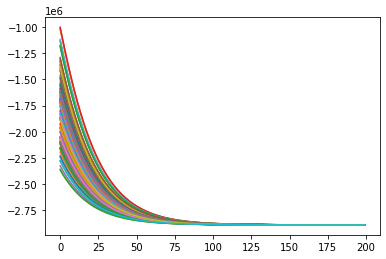

In [213]:
plt.plot(energy)

plt.show()

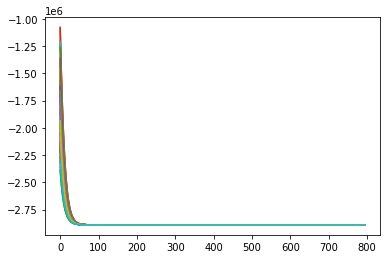

In [164]:
plt.plot(energy)

plt.show()

In [130]:
model.set_state(data[i])

model.relax()

model.S[-10:]

tensor([-1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.])

In [131]:
data[i][-10:]

tensor([-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.])